# **Pandas et Seaborn**
_Tutorat de programmation par Cyprien et Alexandre_

Durant cette séance nous allons utiliser les bibliothèques [pandas](https://pandas.pydata.org/) et [seaborn](https://seaborn.pydata.org/). Ces deux bibliothèques python sont très utilisées dans la DataScience, car elles permettent respectivement de jouer avec de grands jeux de données et de réaliser des représentations graphiques facilement. Nous vous présentons ces deux bibliothèques car ce sont des incontournables et qu'elles fonctionnent particulièrement bien ensemble. L'objectif étant qu'on survole ensemble quelques notions avant de vous laisser jouer avec sur quelques exercices !

## 0. Les chemins d'accès et l'organisations des dossiers

Un élément auquel vous allez être confronté pour charger un fichier est qu'il vous faudra le chemin d'accès de celui-ci ! Pour cela c'est un peu barbant de le faire à la main... et c'est pour cela qu'on vous présente rapidement la bibliothèque `os` ! S'il fallait décrire ce chemin, d'accès, il s'agit d'une chaîne de cractère que je vais vous décomposer en 3 parties.

Si on considère le chemin suivant : 
**"C:\Users\alexa\Bureau\2024-03-12_Seance-tutorat\Pandas_et_Seaborn.ipynb"**

On retrouve :
- Le <span style="color:red"> **séparateur** </span> (dépendant de votre système d'exploitation) : `\` (Win et MacOS) et `/` (Linux).
- La <span style="color:blue"> **racine** </span> (dépendant _aussi_ de votre système d'exploitation) : `\usr` (MacOS), `/home` (Linux) et `C:` (ou `D:`) (Win).
- Les <span style="color:green"> **composant du chemin** </span> : c'est à dire la suite de dossier menant jusqu'au fichier cible avec son extension (`.doc`, `.txt`, `.png`...)

$\Rightarrow$ **"
<span style="color:blue"> C: </span>
<span style="color:red"> \  </span>
<span style="color:green"> Users </span>
<span style="color:red"> \  </span>
<span style="color:green"> alexa </span>
<span style="color:red"> \  </span>
<span style="color:green"> Bureau </span>
<span style="color:red"> \  </span>
<span style="color:green"> 2024-03-12_Seance-tutorat </span>
<span style="color:red"> \  </span>
<span style="color:green"> Pandas_et_Seaborn.ipynb </span>
"**

In [6]:
# Importation
import os

In [7]:
# Récupération du répertoire actuel de travail
path = os.getcwd() # get current working directory
print(path)

c:\Users\alexa\OneDrive\Bureau\2024-03-12_Seance-tutorat


In [8]:
# Nous allons utiliser un dossier regroupant tout les datasets que nous allons utiliser
nom_dossier_datasets = "datasets"

In [9]:
# Composition d'un chemin d'accès à partir de plusieurs éléments indiqués
# la bibliothèque ajoute le séparateur adéquat !
path_datasets = os.path.join(
        path, nom_dossier_datasets
    )
print(path_datasets)

c:\Users\alexa\OneDrive\Bureau\2024-03-12_Seance-tutorat\datasets


In [10]:
# Vérification de l'existence du dossier
os.path.exists(
    path_datasets
)

True

In [11]:
# Listage des éléments présent dans ce dossier
datasets_names = os.listdir(
    path_datasets
)
print(datasets_names)

['clipboard_example.xlsx', 'netflix_userbase.csv', 'titanic.csv']


In [12]:
# Création d'un nouveau dossier
nouveau_dossier = "AAA"
path_nouveau_dossier = os.path.join(path, nouveau_dossier)

os.mkdir(
    path_nouveau_dossier
)

In [13]:
# Supression du dossier récemment créer (ATTENTION)
os.rmdir(
    path_nouveau_dossier
)

## 1. Importation d'un DataSet avec Pandas
Il est possible d'importer directement un dataset qui est dans le "presse-papier" ! Je vous propose pour cela d'ouvrir le fichier "clipboard_example", de selectionner une partie du tableau et de le copier (`Ctrl + C` / `Cmd + C`) !

In [14]:
# Importation de la librairie
import pandas as pd

In [26]:
# Importation d'un dataframe venant du presse papier
data = pd.read_clipboard()
data

,condition,temps,erreur
0,A,1.44,0
1,A,1.21,1
2,A,1.35,0
3,A,1.33,1
4,B,2.12,0
5,B,2.01,1
6,B,2.51,0
7,B,2.39,1
8,C,2.41,0
9,C,2.32,1


On peut vérifier l'importation des du tableau ou bien avoir diverses information dessus plutôt facilement

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   condition  16 non-null     object 
 1   temps      16 non-null     float64
 2   erreur     16 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 516.0+ bytes


In [23]:
data.describe()

,temps,erreur
count,16.000000,16.000000
mean,1.876875,0.500000
std,0.476231,0.516398
min,1.210000,0.000000
25%,1.345000,0.000000
50%,2.000000,0.500000
75%,2.282500,1.000000
max,2.510000,1.000000


In [29]:
data.isnull().sum()

condition    0
temps        0
erreur       0
dtype: int64

On peut dès à présent se rendre compte que pandas présente les données sous la forme d'un tableau, on peut donc désigner une case en fonction de sa colonne (columns/keys) et de son ligne (rows/indexs).

In [32]:
print(data.keys())
data.columns

Index(['condition', 'temps', 'erreur'], dtype='object')


Index(['condition', 'temps', 'erreur'], dtype='object')

In [33]:
data.index

RangeIndex(start=0, stop=16, step=1)

Il est possible de sélectionner une colonne ou une ligne en particulier en suivant cette syntaxe !

In [38]:
data["temps"]

0     1.44
1     1.21
2     1.35
3     1.33
4     2.12
5     2.01
6     2.51
7     2.39
8     2.41
9     2.32
10    2.15
11    2.27
12    1.33
13    1.23
14    1.97
15    1.99
Name: temps, dtype: float64

In [44]:
data.loc[[0,5]]

,condition,temps,erreur
0,A,1.44,0
5,B,2.01,1


In [51]:
data

,condition,temps,erreur
0,A,1.44,0
1,A,1.21,1
2,A,1.35,0
3,A,1.33,1
4,B,2.12,0
5,B,2.01,1
6,B,2.51,0
7,B,2.39,1
8,C,2.41,0
9,C,2.32,1


In [58]:
data_isol = data.loc[data["condition"] == "B", ["temps"]]
data_isol.loc[data["erreur"] == 1]

,temps
5,2.01
7,2.39


## 2. Représentation graphique avec seaborn

L'intérêt de la bibliothèque seaborn est qu'elle est optimisée pour gérer de gros jeux de données et qu'elle fonctionne particulièrement bien avec pandas comme nous allons le voir !

In [62]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
# Importation de la librairie
import seaborn as sns

seaborn fonctionne généralement toujour de la même façon avec 4 arguments à comprendre :
- `data` : dataset utilisé
- `x` : abscisse
- `y` : ordonnée
- `hue` : condition/nuance

<Axes: xlabel='condition', ylabel='temps'>

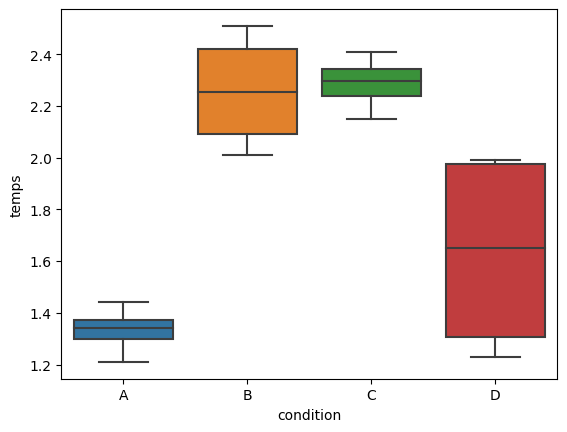

In [70]:
sns.boxplot(data=data, x="condition", y="temps")

<Axes: xlabel='condition', ylabel='temps'>

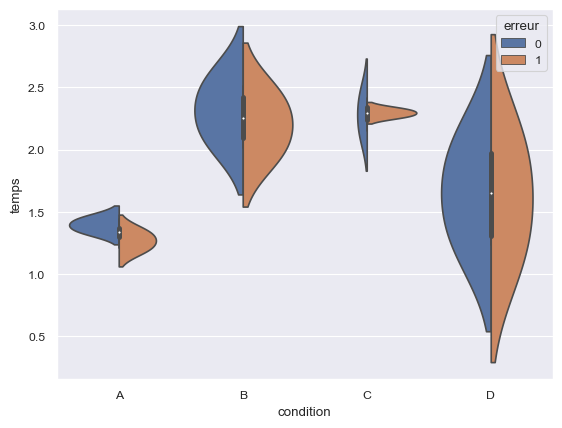

In [74]:
sns.set_theme(context="paper")
sns.violinplot(data=data, x="condition", y="temps", hue="erreur", split=True)

## 3. Passons à un exercice !

L'objectif de cet excercie est que vous importier dans un premier temps le dataset `"netflix_userbase.csv"` grâce à la fonction `read.csv()` !

In [76]:
# Création du chemin du fichier de notre choix
data_path = os.path.join(path_datasets, "netflix_userbase.csv")
print(os.path.exists(data_path))

True


In [77]:
# Importation du dataset (dépend du format du fichier)
# Il est important, dans un premier temps de connaitre deux éléments qui parfois change : le "sep" et le "decimal" !
DATA = pd.read_csv(data_path)

Vérifiez l'importation et trouver le type de donné de chaque colonne, le nombre d'élément nul ainsi que le nom de chaque colonne !

In [78]:
# Vérification de l'importation
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [79]:
# Type des 
DATA.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [97]:
# Nombre d'élément nul

In [98]:
# Nom de chaque colonne

Faites quelques représentation graphique afin de représenter les phrases suivantes :
1. Représentation de la distribution de l'âge en fonction du genre
2. Représentation de la distribution du revenue mensuelle en fonction du pays selon le genre
3. Corrélation entre le revenue mensuel et l'âge selon le genre

<Axes: xlabel='Gender', ylabel='Age'>

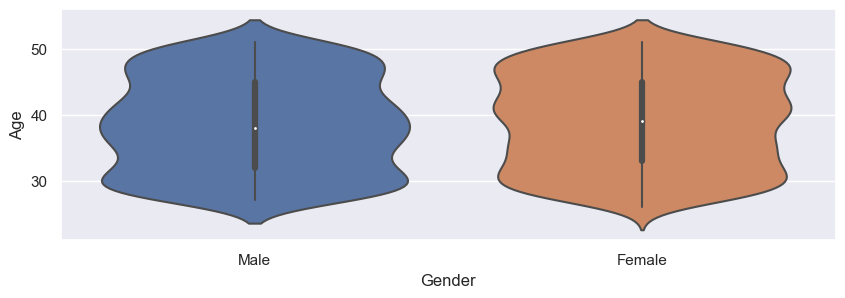

In [88]:
#1 Représentation de la distribution de l'âge en fonction du genre
sns.set(rc={'figure.figsize':(10 , 3)})
sns.violinplot(data=DATA, x="Gender", y="Age")

In [94]:
#2 Représentation de la distribution du revenue mensuelle en fonction du pays selon le genre


<Axes: xlabel='Age', ylabel='Monthly Revenue'>

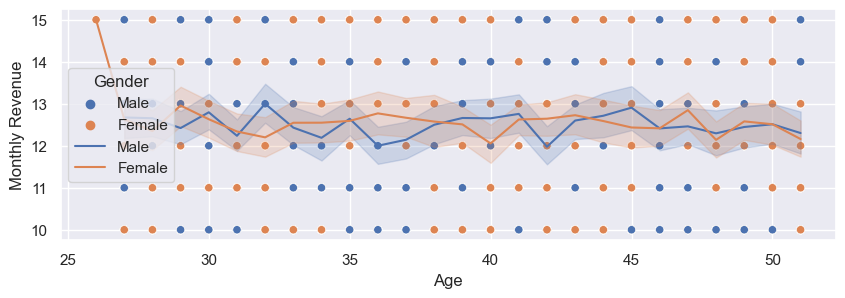

In [91]:
#3 Corrélation entre le revenue mensuel et l'âge selon le genre
sns.scatterplot(data=DATA, x="Age", y="Monthly Revenue", hue="Gender")
sns.lineplot(data=DATA, x="Age", y="Monthly Revenue", hue="Gender")

Maintenant que nous nous sommes bien amusé, je vous laisse soit vous plonger dans le `"tinanic.csv"` avec le notebook du même nom soit tenter d'importer un dataset trouvé sur internet ou bien un dataset à vous, c'est le moment de mettre les main dans le cambouis !